# TME 5 - Logistic Regression
# k-fold cross validation

Podlejski & Perrin


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn import linear_model, datasets
from sklearn.model_selection import KFold
import warnings; warnings.simplefilter('ignore')

We first generate and plot the actual datasets

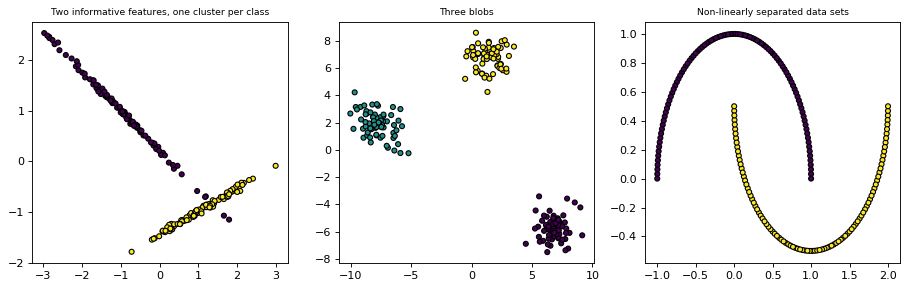

In [17]:
# First simulated data set
plt.figure(figsize=(14,4), dpi=80)
plt.subplot(131)
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=20, edgecolor='k')


# Second simulated data set
plt.subplot(132)
plt.title("Three blobs", fontsize='small')
X2, Y2 = make_blobs(n_samples=200, n_features=2, centers=3)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=20, edgecolor='k')


# Third simulated data set
plt.subplot(133)
plt.title("Non-linearly separated data sets", fontsize='small')
X3, Y3 = make_moons(n_samples=200, shuffle=True, noise=None, random_state=None)
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3, s=20, edgecolor='k')
plt.show()

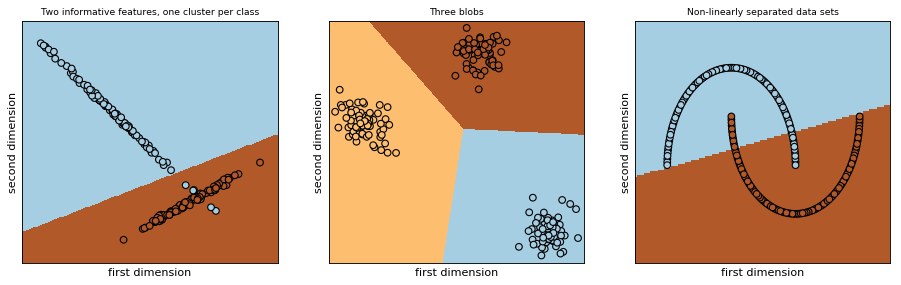

In [18]:
logreg = linear_model.LogisticRegression(C=1e5)

def train_and_plot(X,Y):
    logreg.fit(X, Y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('first dimension')
    plt.ylabel('second dimension')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

# First simulated data set
plt.figure(figsize=(14,4), dpi=80)
plt.subplot(131)
plt.title("Two informative features, one cluster per class", fontsize='small')
train_and_plot(X1,Y1)


# Second simulated data set
plt.subplot(132)
plt.title("Three blobs", fontsize='small')
train_and_plot(X2,Y2)

# Third simulated data set
plt.subplot(133)
plt.title("Non-linearly separated data sets", fontsize='small')
train_and_plot(X3,Y3)
plt.show()

In [19]:
def doKFold(X,Y,k):
    kf = KFold(n_splits=k)
    acc = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        logreg.fit(X_train, Y_train)
        acc += logreg.score(X_test,Y_test)
    return acc/k

print("Classification : ", doKFold(X1,Y1,5))
print("Blobs : ", doKFold(X2,Y2,5))
print("Moons : ", doKFold(X3,Y3,5))

Classification :  0.9650000000000001
Blobs :  1.0
Moons :  0.875


In [165]:
def prob_y_one(theta,x):
    p = np.exp(theta.dot(x.T))
    return p/(1+p)

def prob_y_zero(theta,x):
    return 1 - prob_y_one(theta,x)

def grad_hess(X,Y,theta):
    global n_feature 
    global n_data
    grad = np.zeros((1,n_feature))
    hess = np.zeros((n_feature,n_feature))
    for i in range(n_data):
        x = X[i]
        x = x[None,:]
        p = prob_y_one(theta,x)
        grad += x*(Y[i]-p)
        hess += x.T.dot(x)*p*(1-p)
    return -grad,hess
    

def binary_grad_descent(X,Y,N):
    global n_feature 
    global n_data
    n_feature = X.shape[1]
    n_data = X.shape[0]
    theta = np.zeros((1,n_feature))
    for i in range(N):
        grad,hess = grad_hess(X,Y,theta)
        theta = theta - np.dot(grad,np.linalg.inv(hess).T)
    return theta


In [166]:
binary_grad_descent(X1,Y1,100)

array([[ 0.19542184, -3.30948755]])

In [156]:
def doKFold2(X,Y,k):
    kf = KFold(n_splits=k)
    acc = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        binary_grad_descent(X_train,Y_train)

NameError: name 'grad' is not defined